<a href="https://colab.research.google.com/github/shraddha240303/Projects/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Train.csv')

In [ ]:
df.shape

(8068, 11)

In [ ]:
df.sample(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
2626,464162,Male,Yes,81,Yes,Lawyer,NaN,High,2.0,Cat_6,C
2903,466312,Female,No,21,No,Healthcare,0.0,Low,3.0,Cat_4,D
4240,463633,Male,Yes,33,Yes,Doctor,0.0,Average,2.0,Cat_6,B
679,463960,Male,Yes,26,Yes,Doctor,1.0,Average,2.0,Cat_7,A
58,465269,Female,Yes,45,Yes,Artist,1.0,Average,3.0,Cat_3,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [ ]:
df.isnull().mean()*100

,0
ID,0.000000
Gender,0.000000
Ever_Married,1.735250
Age,0.000000
Graduated,0.966782
Profession,1.536936
Work_Experience,10.275161
Spending_Score,0.000000
Family_Size,4.152206
Var_1,0.941993


In [ ]:
df.drop('ID',axis=1,inplace=True)

In [ ]:
cols= [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['Ever_Married', 'Graduated', 'Profession', 'Family_Size', 'Var_1']

In [ ]:
len(df[cols].dropna()) / len(df)

0.9142290530490828

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.isnull().mean()*100

,0
Gender,0.0
Ever_Married,0.0
Age,0.0
Graduated,0.0
Profession,0.0
Work_Experience,0.0
Spending_Score,0.0
Family_Size,0.0
Var_1,0.0
Segmentation,0.0


In [ ]:
df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [ ]:
df['Segmentation'].value_counts()

,count
Segmentation,
D,1757
C,1720
A,1616
B,1572


In [ ]:
df['Work_Experience'] = df['Work_Experience'].astype('int64')
df['Family_Size'] = df['Family_Size'].astype('int64')

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

le = LabelEncoder()
df['Segmentation'] = le.fit_transform(df['Segmentation'])

'''transformer = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(drop='first'), ['Gender', 'Profession', 'Var_1']),
    ('tnf2', OrdinalEncoder(categories=[['Yes', 'No'], ['Yes', 'No'], ['High', 'Average', 'Low']]),
     ['Ever_Married', 'Graduated', 'Spending_Score'])
], remainder='passthrough')'''

df = df.drop(columns=['Graduated', 'Gender', 'Profession', 'Var_1'])
transformer = ColumnTransformer(transformers=[
    ('tnf2', OrdinalEncoder(categories=[['Yes', 'No'], ['High', 'Average', 'Low']]),
     ['Ever_Married', 'Spending_Score'])
], remainder='passthrough')

X_transformed = transformer.fit_transform(df.drop(columns=['Segmentation']))
X_transformed_scale = pd.DataFrame(X_transformed, columns=transformer.get_feature_names_out())

In [ ]:
from sklearn.preprocessing import RobustScaler

rb = RobustScaler()
X_transformed_scale = rb.fit_transform(X_transformed)

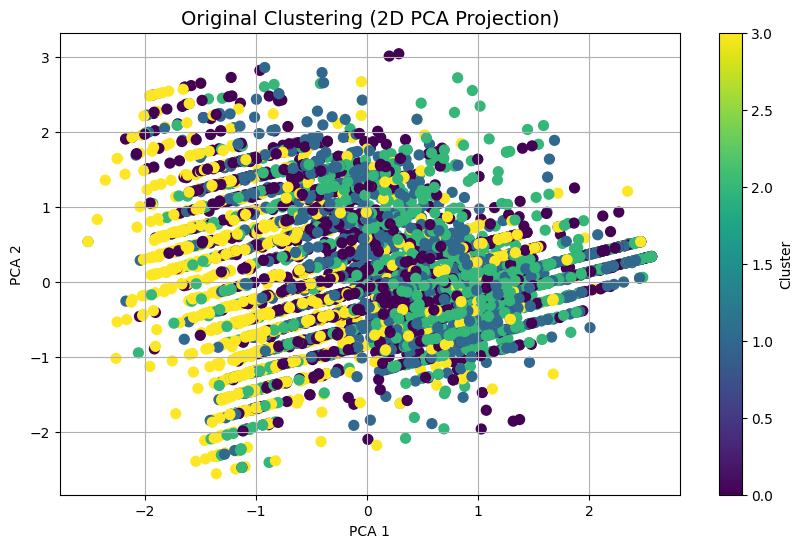

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed_scale)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
plt.figure(figsize=(10, 6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Segmentation'], cmap='viridis', s=50)
plt.title('Original Clustering (2D PCA Projection)', fontsize=14)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
loadings = pca.components_
feature_names = transformer.get_feature_names_out()
pca_loadings = pd.DataFrame(loadings.T, columns=['PCA1', 'PCA2'], index=feature_names)
pca_loadings['abs_PCA1'] = np.abs(pca_loadings['PCA1'])
important_features = pca_loadings.sort_values(by='abs_PCA1', ascending=False)
print(important_features[['PCA1', 'PCA2']].head(20))

                                PCA1      PCA2
remainder__Age              0.633556  0.230462
tnf2__Spending_Score       -0.537364 -0.070749
remainder__Work_Experience -0.393955  0.789145
tnf2__Ever_Married         -0.359905 -0.108351
remainder__Family_Size     -0.158473 -0.554430


In [ ]:
important_cols = ['Age', 'Spending_Score', 'Ever_Married', 'Work_Experience', 'Family_Size']

In [ ]:
from sklearn.cluster import KMeans

wcss_1 = []
range_values = range(1, 10)
for i in range_values:
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X_transformed_scale)
  wcss_1.append(kmeans.inertia_)

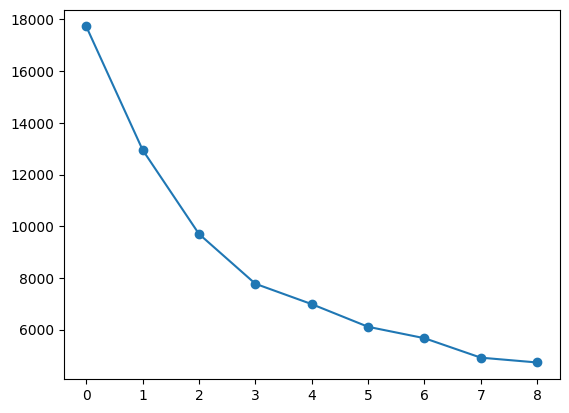

In [ ]:
import plotly.express as px

grafico = px.line(x = range(1,10), y = wcss_1)
plt.plot(wcss_1, '-o',)
grafico.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_transformed_scale)
labels = kmeans.labels_
df['cluster_1'] = labels

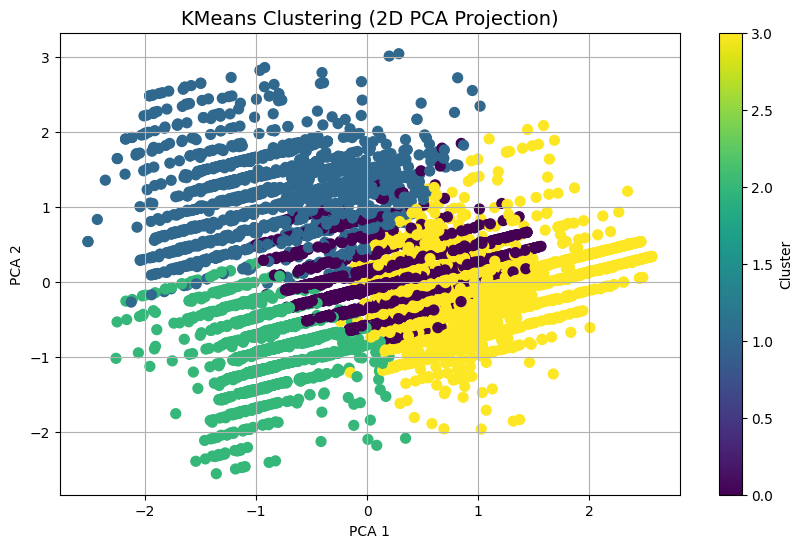

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['cluster_1'], cmap='viridis', s=50)
plt.title('KMeans Clustering (2D PCA Projection)', fontsize=14)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(df['Segmentation'], df['cluster_1'])
nmi = normalized_mutual_info_score(df['Segmentation'], df['cluster_1'])

print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")

Adjusted Rand Index (ARI): 0.097
Normalized Mutual Information (NMI): 0.096


In [ ]:
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment

conf_mat = pd.crosstab(df['Segmentation'], df['cluster_1'])
row_ind, col_ind = linear_sum_assignment(-conf_mat.values)
label_mapping = {col: row for row, col in zip(row_ind, col_ind)}
mapped_preds = df['cluster_1'].map(label_mapping)
acc = accuracy_score(df['Segmentation'], mapped_preds)
print(f"Clustering Accuracy: {acc:.3f}")

Clustering Accuracy: 0.412


Text(0, 0.5, 'Y')

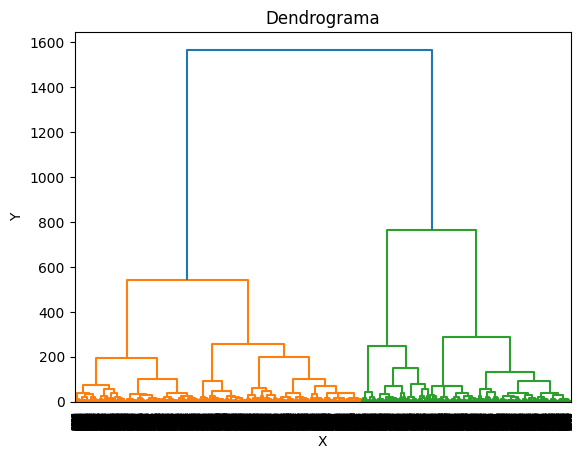

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

dendrograma = dendrogram(linkage(X_transformed, method='ward'))
plt.title('Dendrograma')
plt.xlabel('X')
plt.ylabel('Y')

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc_g = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage = 'ward')
rotulos = hc_g.fit_predict(X_transformed)

df['cluster_2'] = rotulos

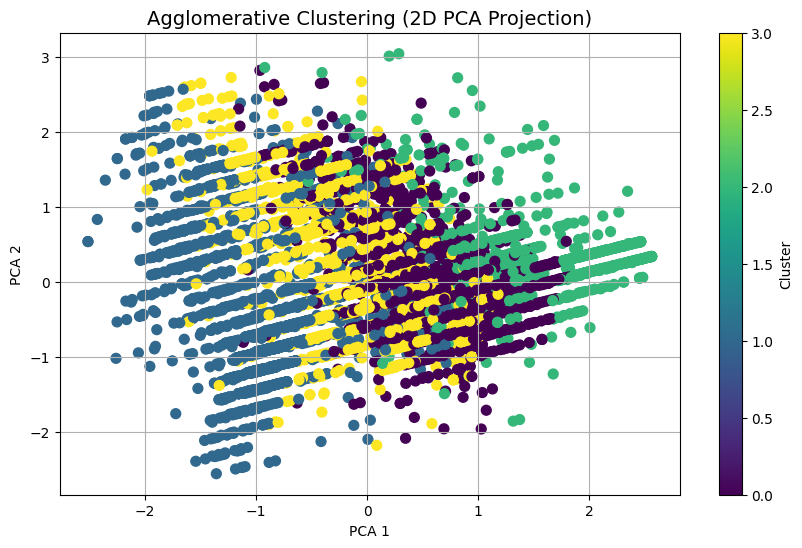

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['cluster_2'], cmap='viridis', s=50)
plt.title('Agglomerative Clustering (2D PCA Projection)', fontsize=14)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
ari = adjusted_rand_score(df['Segmentation'], df['cluster_2'])
nmi = normalized_mutual_info_score(df['Segmentation'], df['cluster_2'])

print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")

Adjusted Rand Index (ARI): 0.116
Normalized Mutual Information (NMI): 0.104


In [ ]:
conf_mat = pd.crosstab(df['Segmentation'], df['cluster_2'])
row_ind, col_ind = linear_sum_assignment(-conf_mat.values)
label_mapping = {col: row for row, col in zip(row_ind, col_ind)}
mapped_preds = df['cluster_2'].map(label_mapping)
acc = accuracy_score(df['Segmentation'], mapped_preds)
print(f"Clustering Accuracy: {acc:.3f}")

Clustering Accuracy: 0.431


In [ ]:
from sklearn.cluster import DBSCAN

dbscan_g = DBSCAN(eps = 0.95, min_samples=4)
dbscan_g.fit(X_transformed)
df['cluster_3'] = dbscan_g.labels_

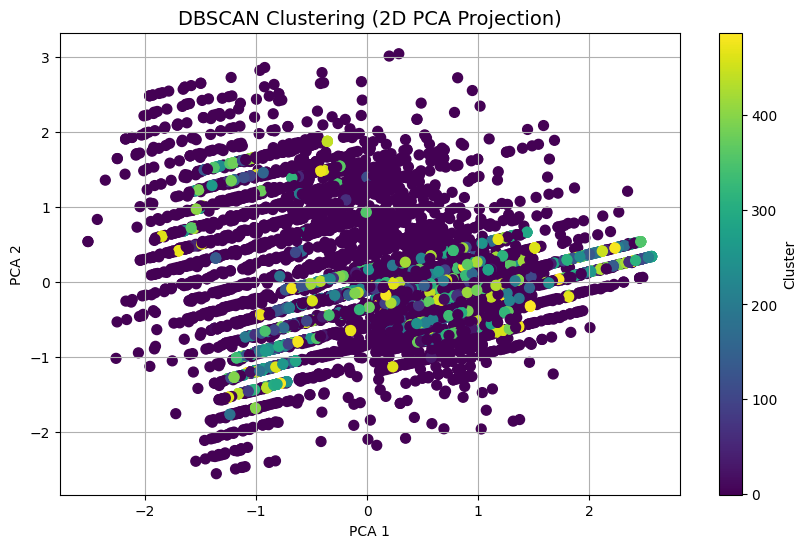

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['cluster_3'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering (2D PCA Projection)', fontsize=14)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(df['Segmentation'], df['cluster_3'])
nmi = normalized_mutual_info_score(df['Segmentation'], df['cluster_3'])

print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")

Adjusted Rand Index (ARI): -0.000
Normalized Mutual Information (NMI): 0.103
